# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Stephen Helenus
- **Email:** stephenhelk@gmail.com
- **ID Dicoding:** stephen_helenus

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuara terhadap jumlah penyewaan sepeda?
- Apakah cuaca sangat buruk secara signifikan mengurangi jumlah penyewaan sepeda?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat 2 databset, yaitu dataset per-hari dan dataset per-jam
- Beberapa kolom berbentuk angka untuk mewakilkan sebuah kata. Seperti kolom `mnth`, 1 untuk Januari dan 12 untuk Desember. kita akan mengubahnya pada Assessing Data.  

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Mengubah angka bulan menjadi nama bulan
day_df["mnth"] = day_df["mnth"].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})

hour_df["mnth"] = hour_df["mnth"].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})

# Mengubah kategori cuaca
day_df["weathersit"] = day_df["weathersit"].map({
    1: "Baik", 2: "Mendung", 3: "Buruk", 4: "Sangat Buruk"
})

hour_df["weathersit"] = hour_df["weathersit"].map({
    1: "Baik", 2: "Mendung", 3: "Buruk", 4: "Sangat Buruk"
})

# Mengubah kategori musim
day_df["season"] = day_df["season"].map({
    1: "Dingin", 2: "Semi", 3: "Panas", 4: "Gugur"
})

hour_df["season"] = hour_df["season"].map({
    1: "Dingin", 2: "Semi", 3: "Panas", 4: "Gugur"
})

In [6]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [7]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Dingin,0,Jan,0,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Dingin,0,Jan,0,0,0,Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Dingin,0,Jan,0,1,1,Baik,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Dingin,0,Jan,0,2,1,Baik,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Dingin,0,Jan,0,3,1,Baik,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Dingin,0,Jan,0,0,6,0,Baik,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Dingin,0,Jan,1,0,6,0,Baik,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Dingin,0,Jan,2,0,6,0,Baik,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Dingin,0,Jan,3,0,6,0,Baik,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Dingin,0,Jan,4,0,6,0,Baik,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,dteday,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,dteday,yr,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,0.502561,11.546752,0.028770,3.003683,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,0.000000,6.000000,0.000000,1.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,1.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,1.000000,18.000000,0.000000,5.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,1.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,6.914405,0.167165,2.005771,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


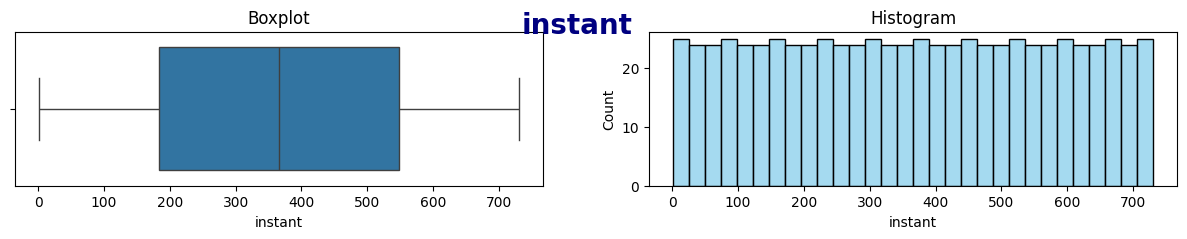

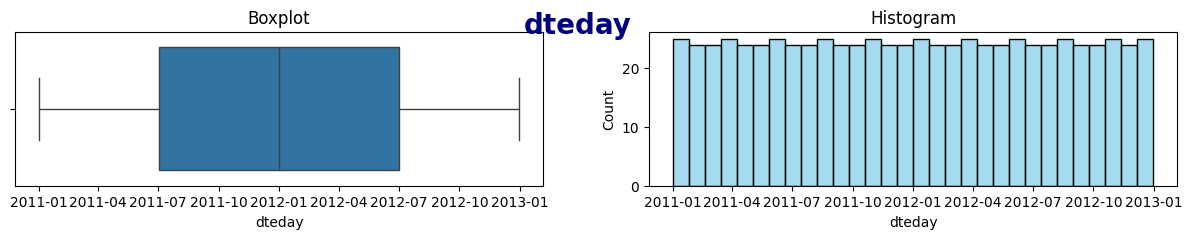

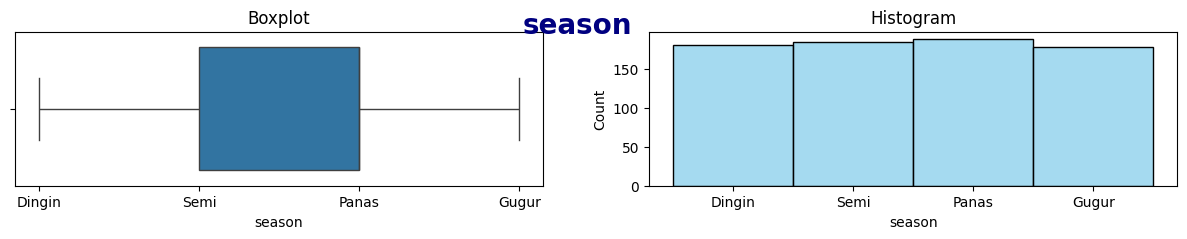

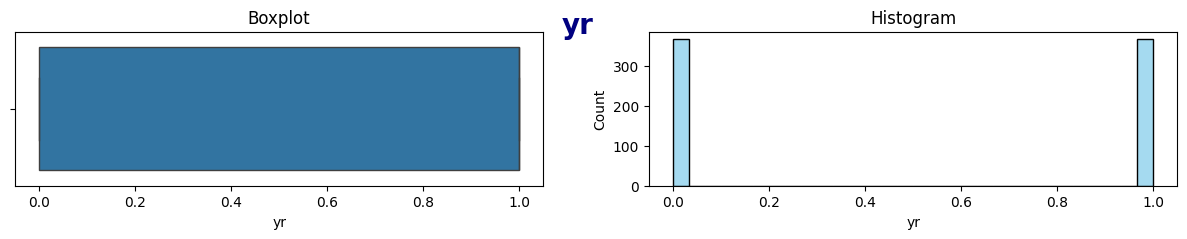

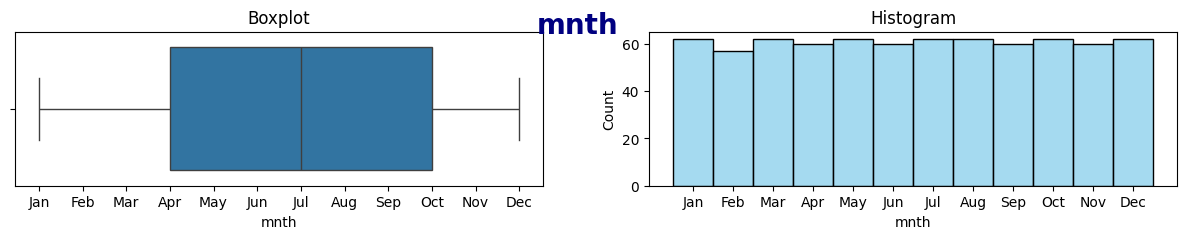

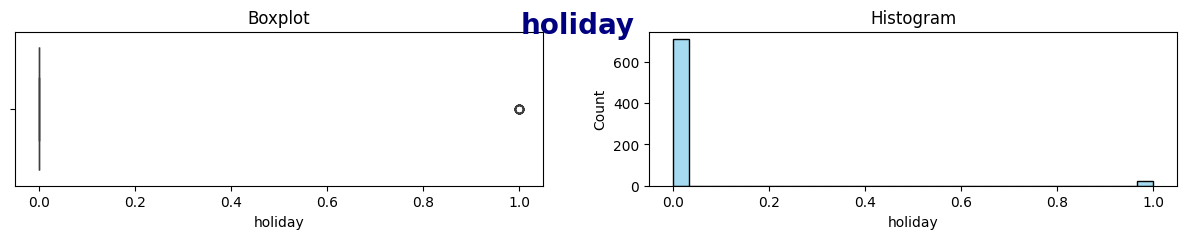

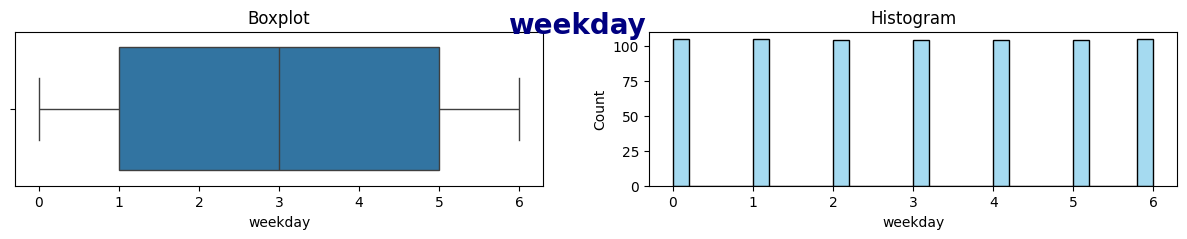

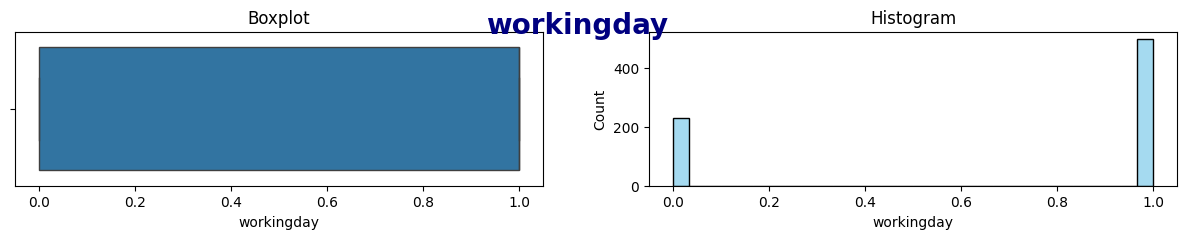

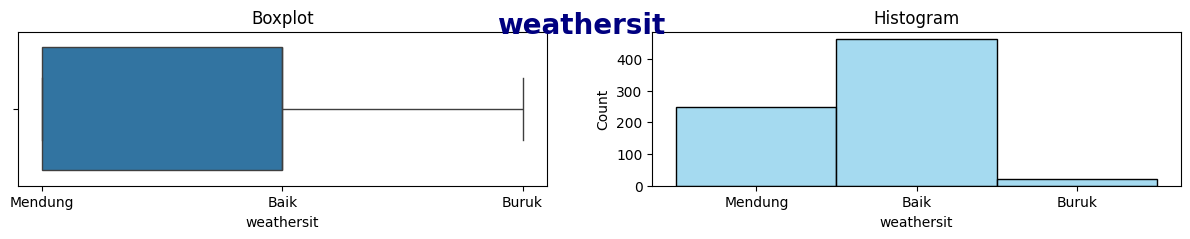

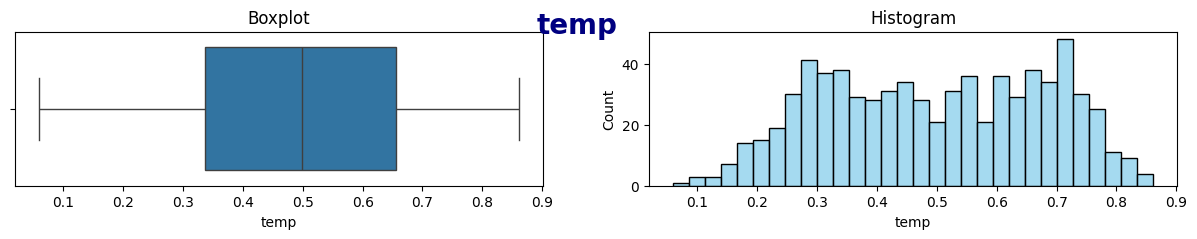

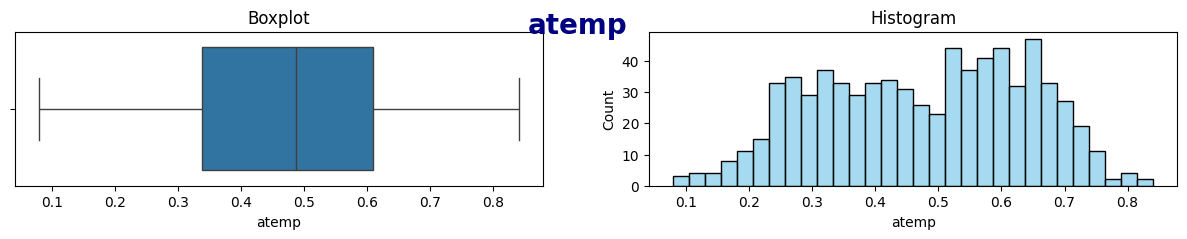

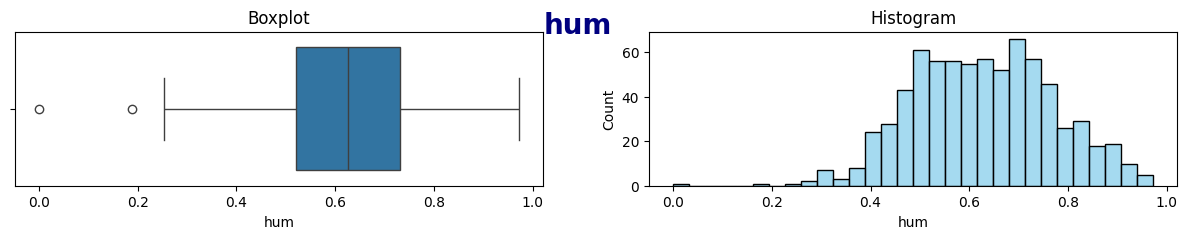

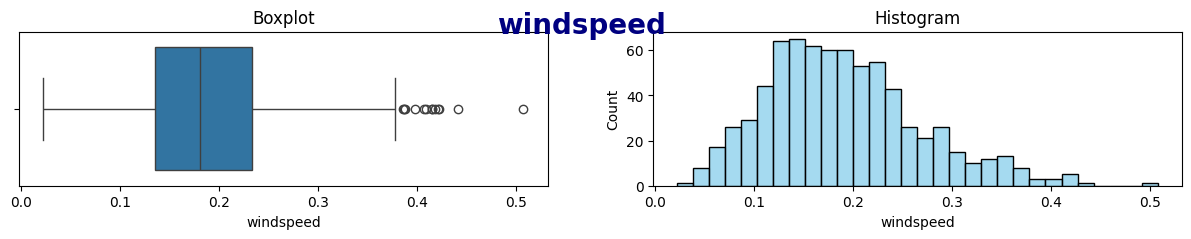

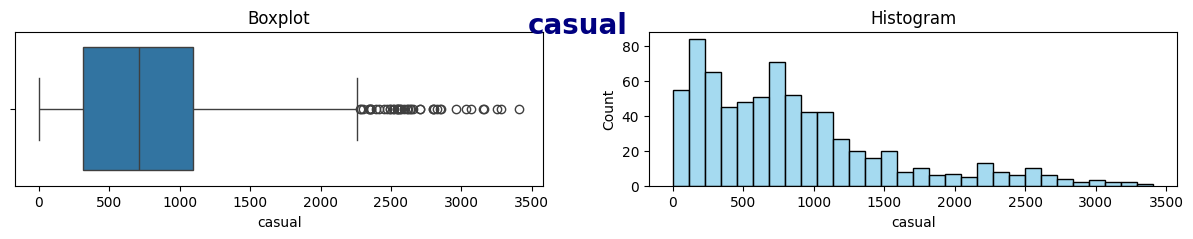

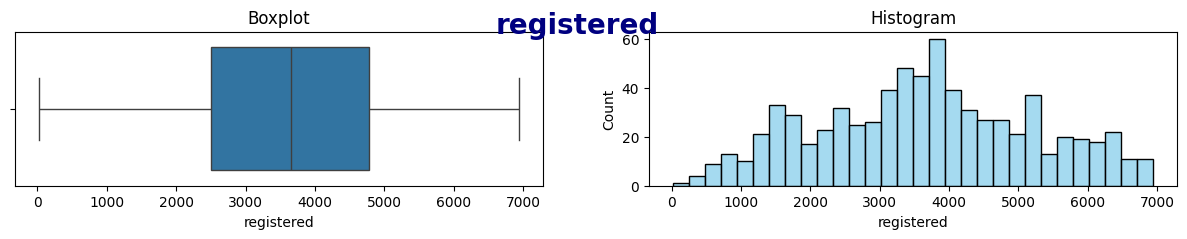

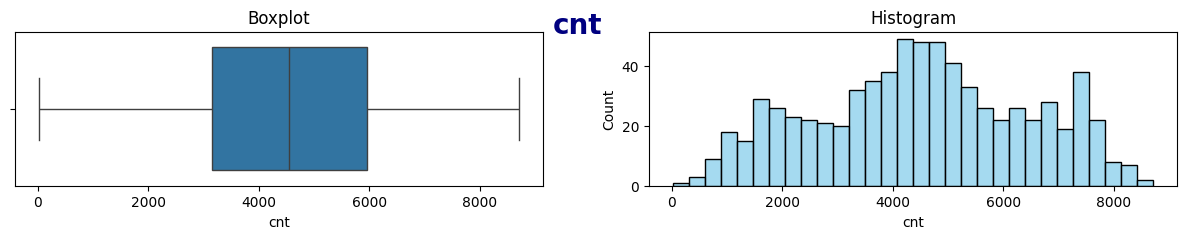

In [13]:
for i in range(0, len(day_df.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    plt.suptitle(day_df.columns[i], fontsize=20, fontweight='bold', color='navy')

    # Membuat boxplot
    sns.boxplot(x=day_df.columns[i], data=day_df, ax=ax[0])
    ax[0].set_title('Boxplot')

    # Membuat histogram
    sns.histplot(data=day_df, x=day_df.columns[i], bins=30, color='skyblue', ax=ax[1])
    ax[1].set_title('Histogram')

    plt.show()

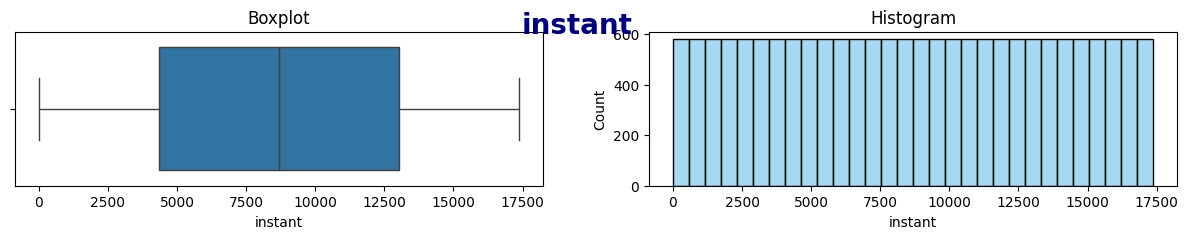

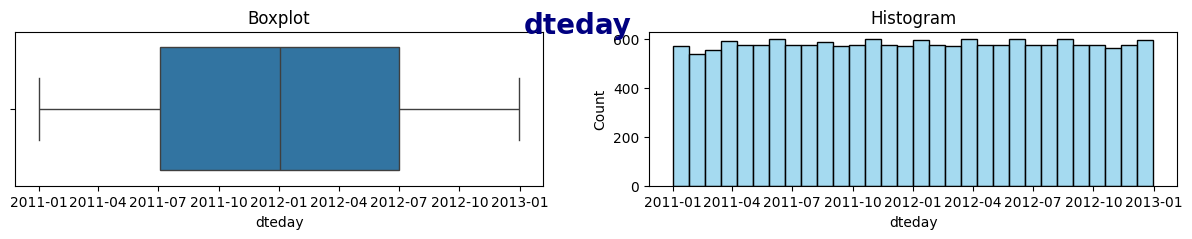

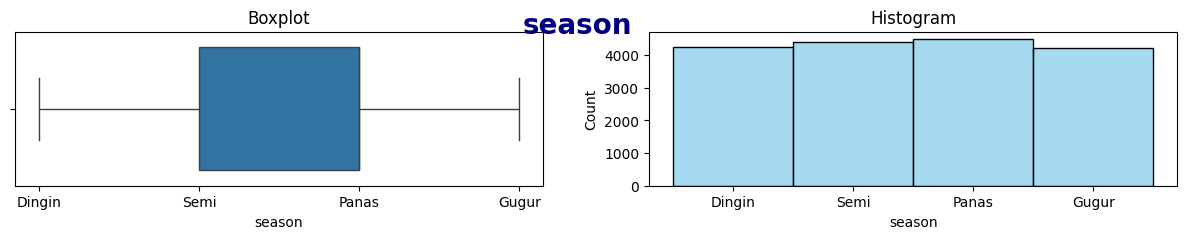

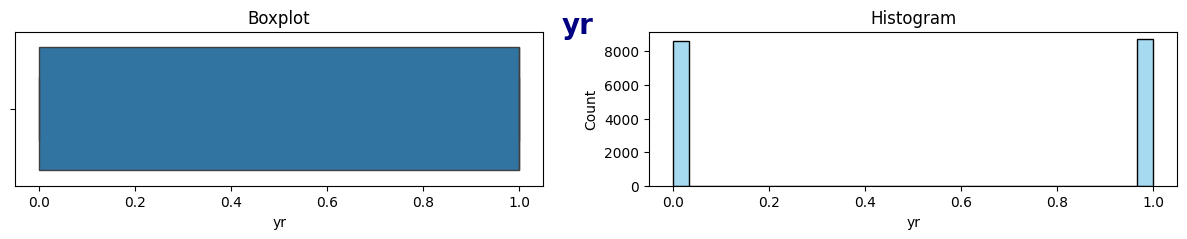

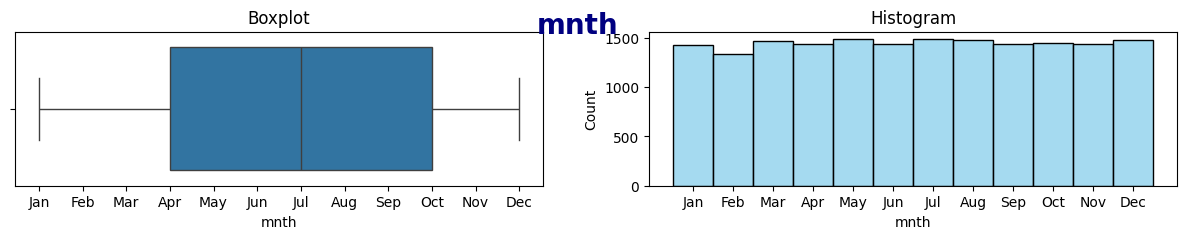

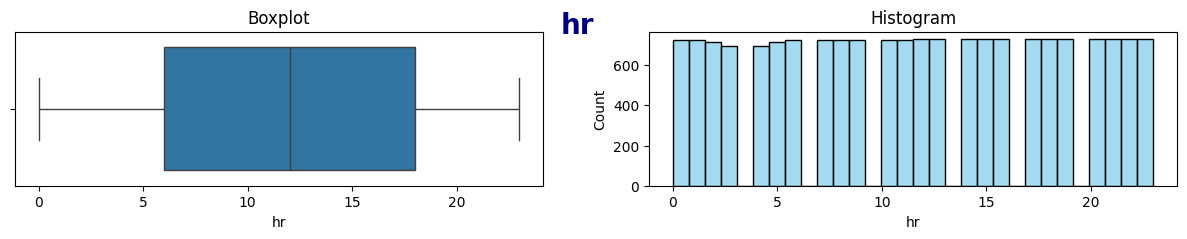

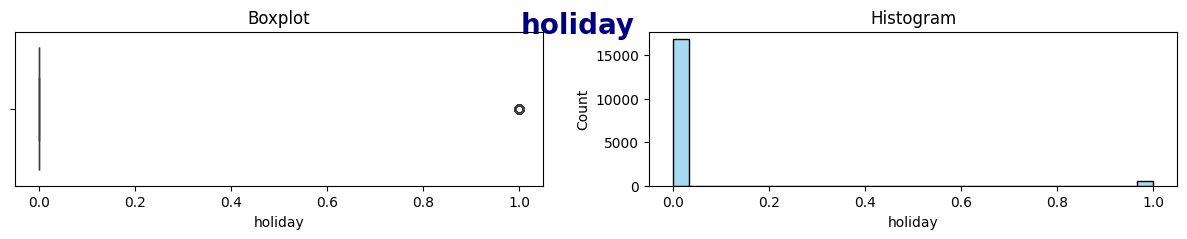

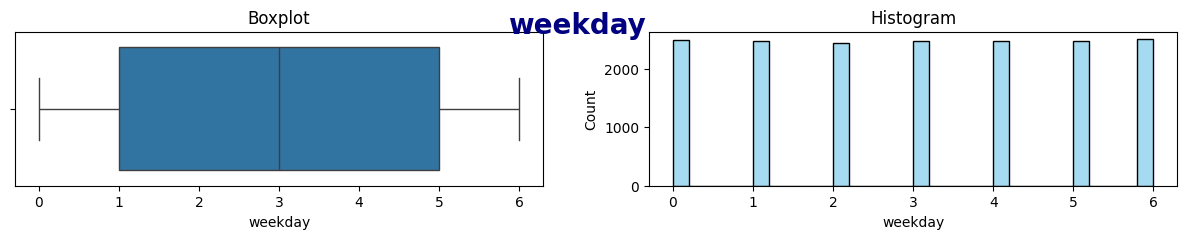

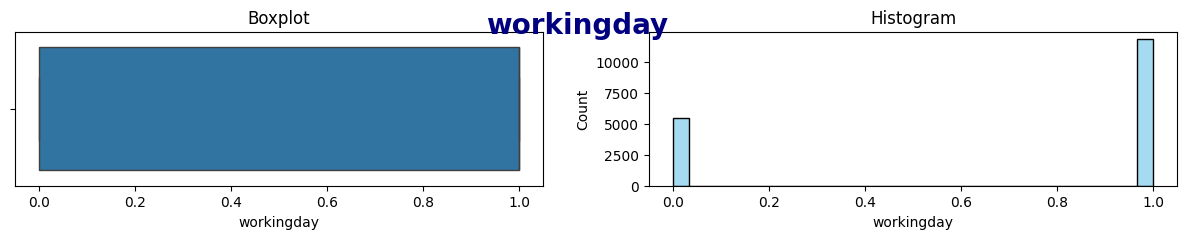

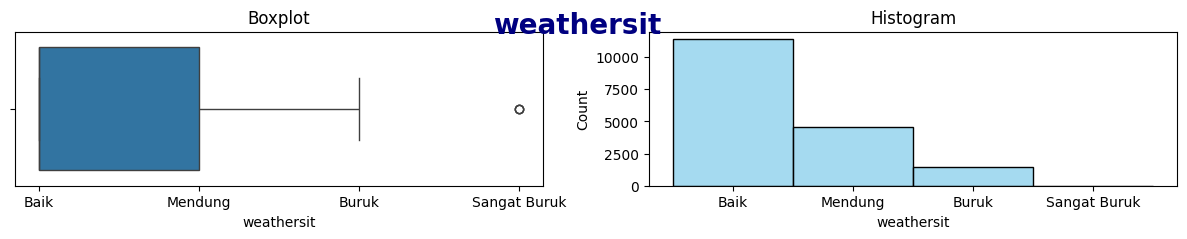

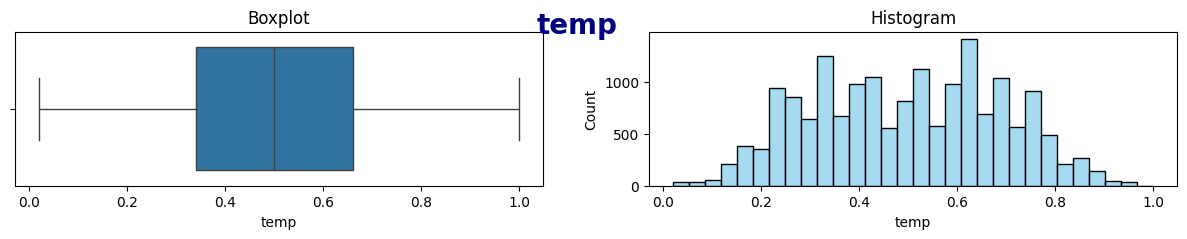

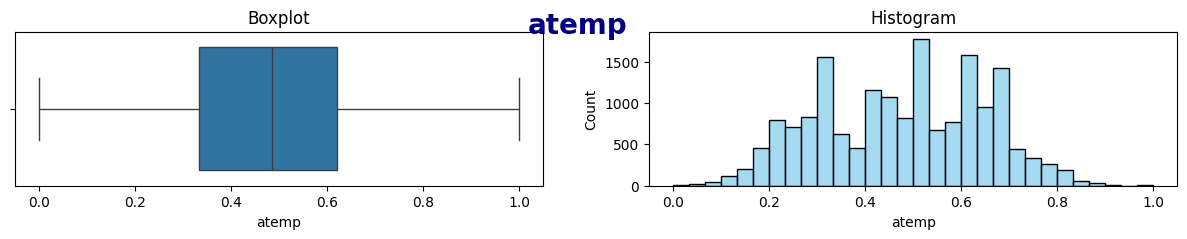

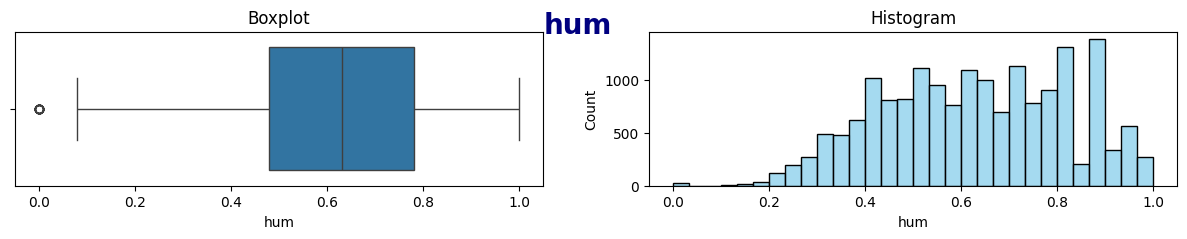

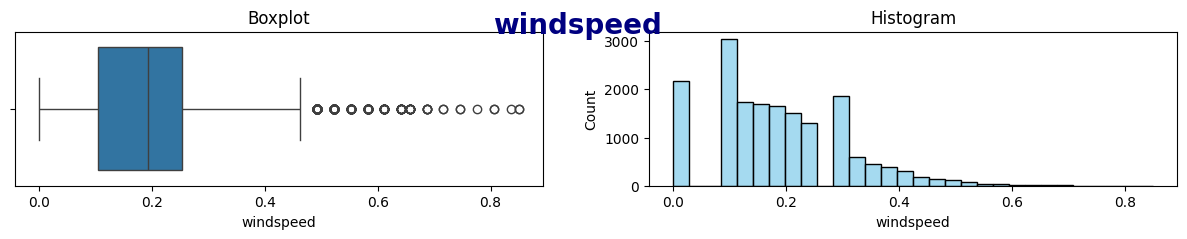

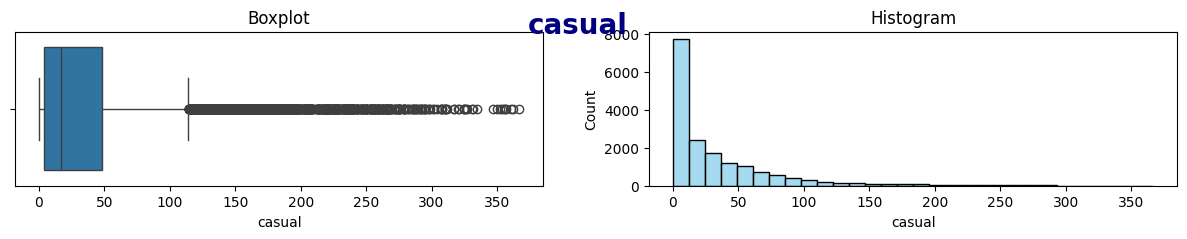

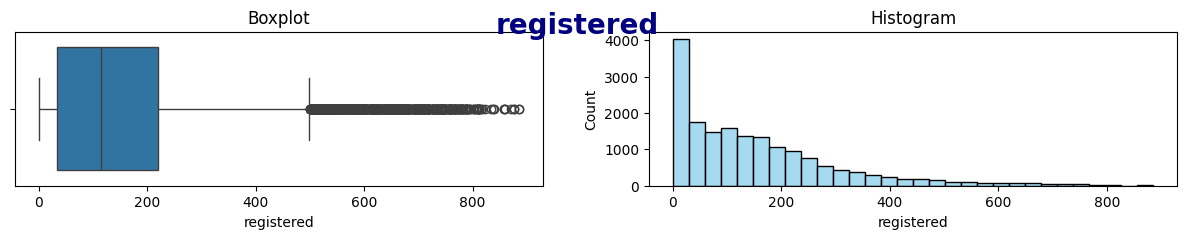

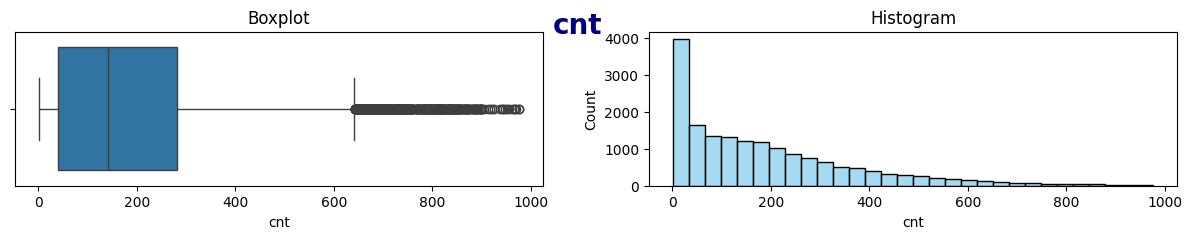

In [14]:
for i in range(0, len(hour_df.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    plt.suptitle(hour_df.columns[i], fontsize=20, fontweight='bold', color='navy')

    # Membuat boxplot
    sns.boxplot(x=hour_df.columns[i], data=hour_df, ax=ax[0])
    ax[0].set_title('Boxplot')

    # Membuat histogram
    sns.histplot(data=hour_df, x=hour_df.columns[i], bins=30, color='skyblue', ax=ax[1])
    ax[1].set_title('Histogram')

    plt.show()

**Insight:**
- Dari data yang didapatkan, tidak ada kolom yang memiliki duplicate data, missing value, dan inaccurate value.
- Namun saat melihat outlier dengan boxplot, beberapa kolom memiliki outlier yang mungkin dapat merusak analisis kedepannya.

### Cleaning Data

In [15]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Dingin,0,Jan,0,0,6,0,Baik,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Dingin,0,Jan,1,0,6,0,Baik,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Dingin,0,Jan,2,0,6,0,Baik,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Dingin,0,Jan,3,0,6,0,Baik,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Dingin,0,Jan,4,0,6,0,Baik,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
outlier_columns = ["windspeed", "casual"]

# Menghapus outlier menggunakan IQR
for col in outlier_columns:
    Q1 = day_df[col].quantile(0.25)  # Kuartil 1
    Q3 = day_df[col].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang Interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter hanya data dalam rentang IQR
    day_df = day_df[(day_df[col] >= lower_bound) & (day_df[col] <= upper_bound)]

print(f"Jumlah data setelah menghapus outlier: {len(day_df)}")

Jumlah data setelah menghapus outlier: 677


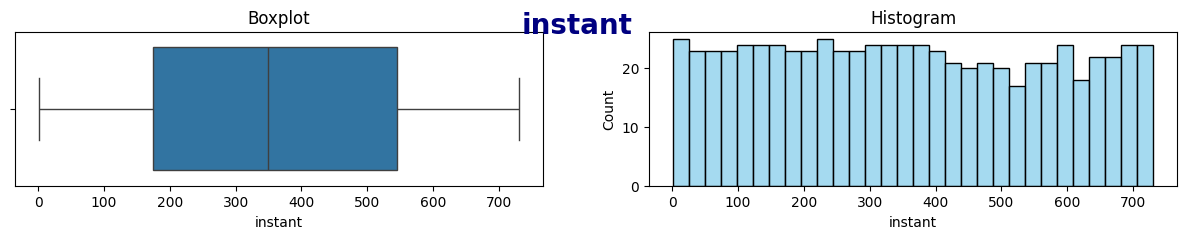

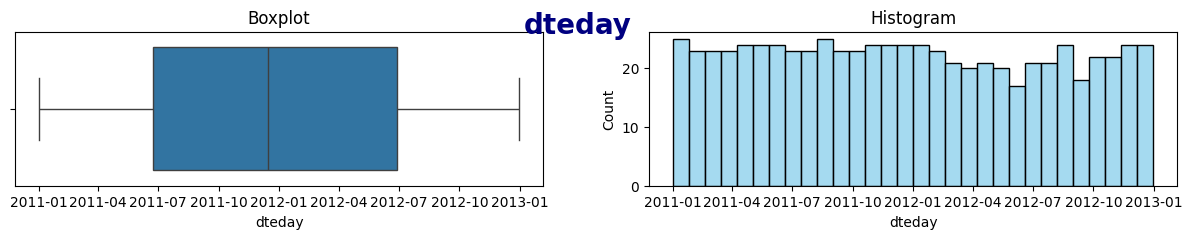

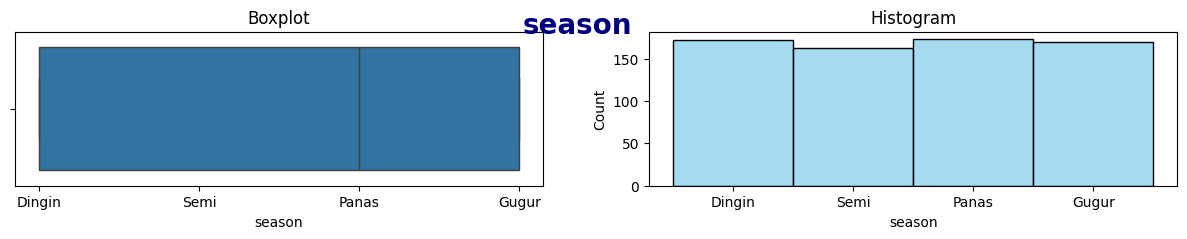

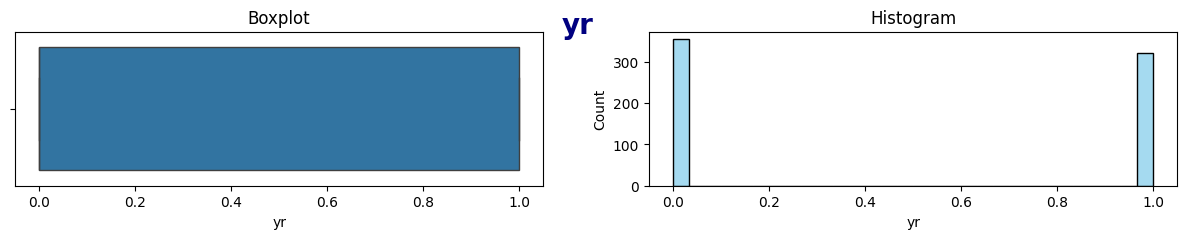

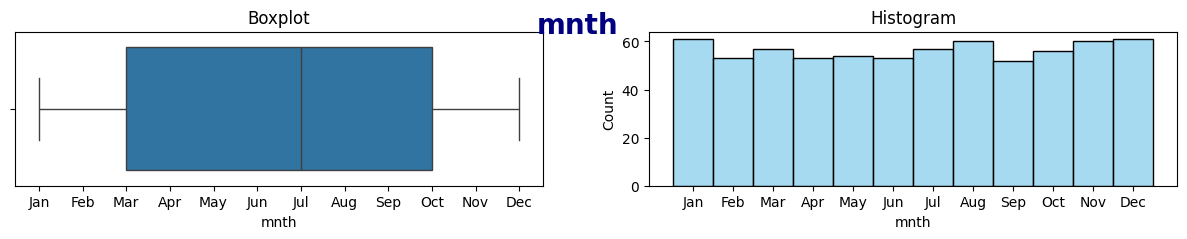

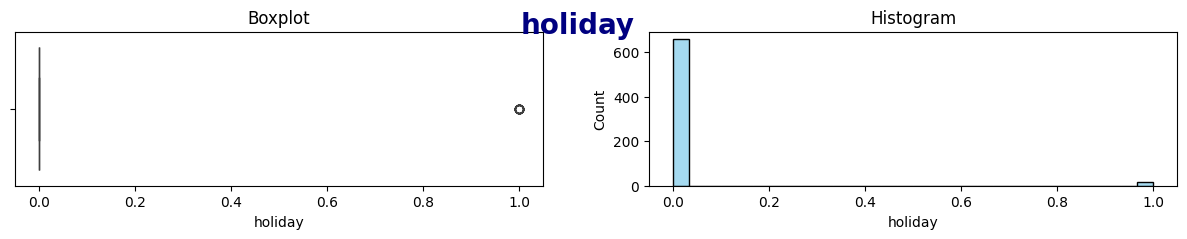

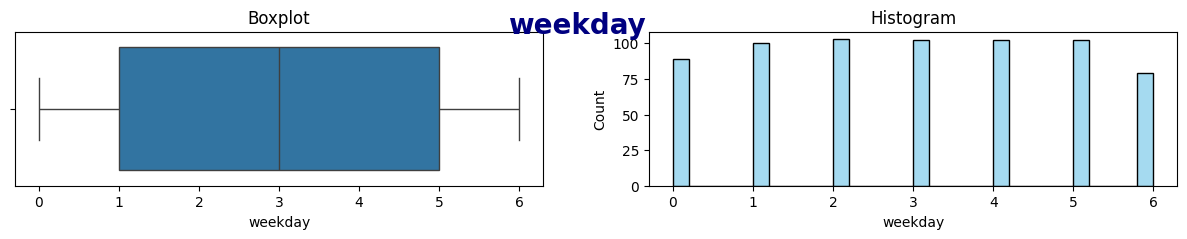

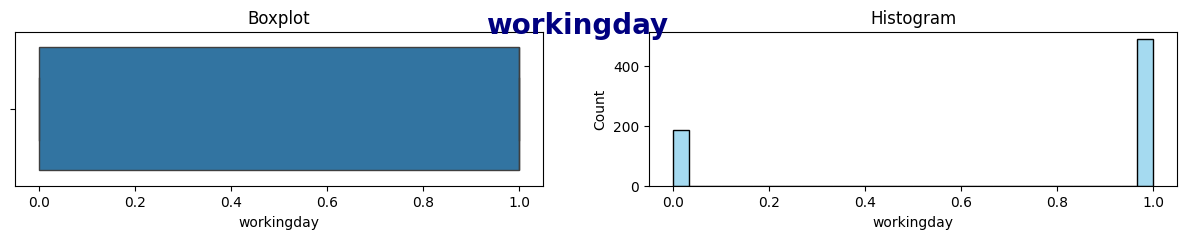

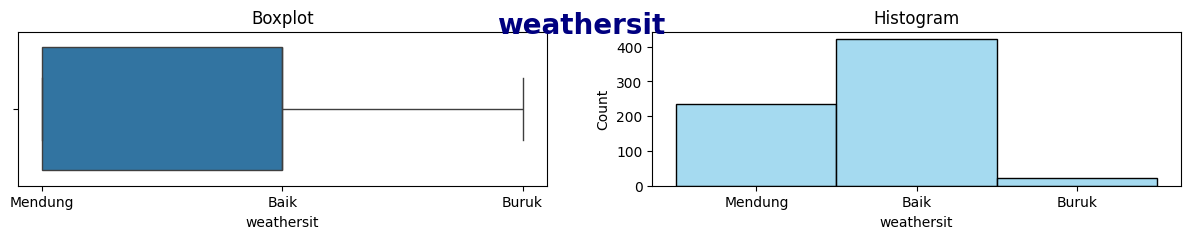

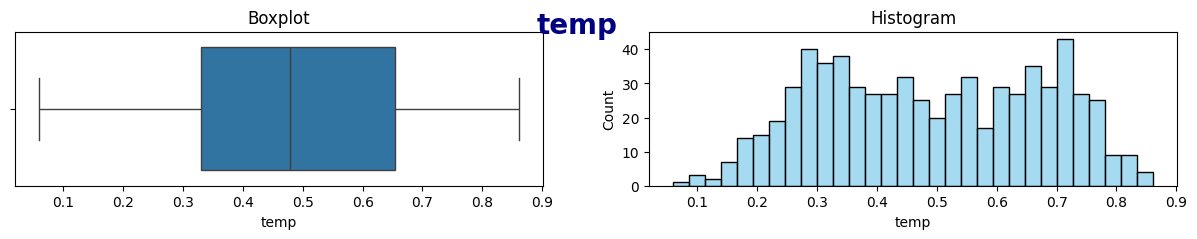

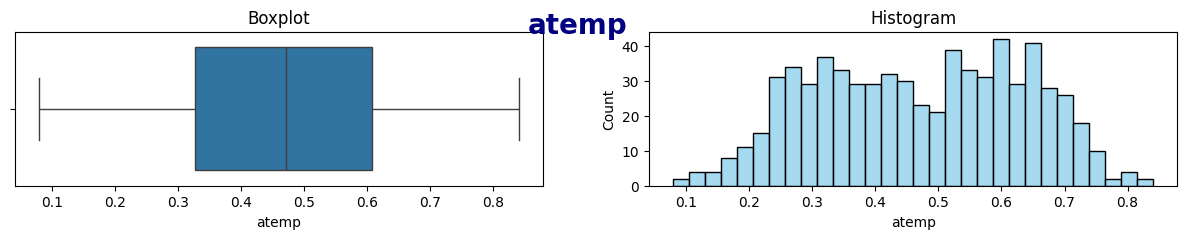

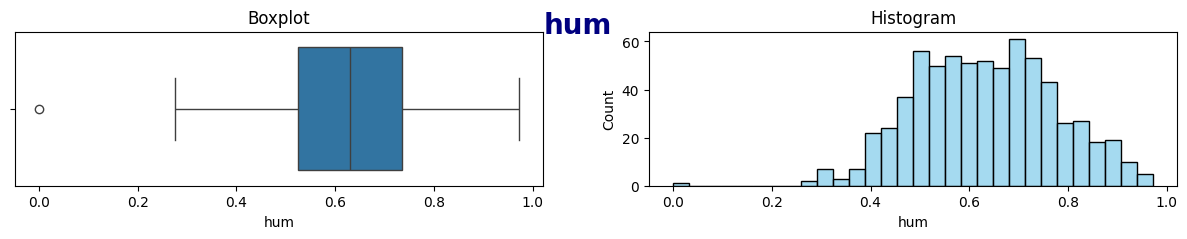

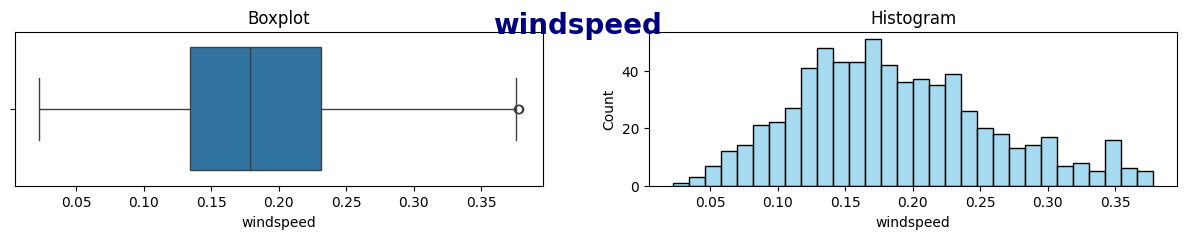

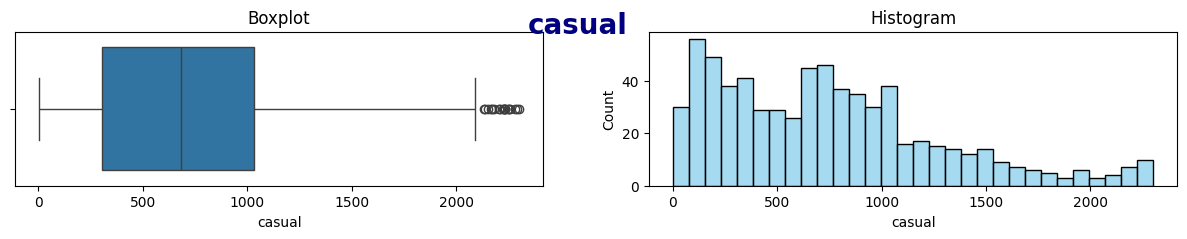

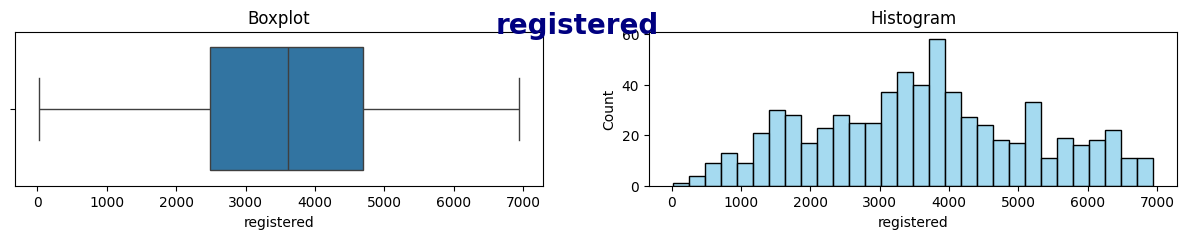

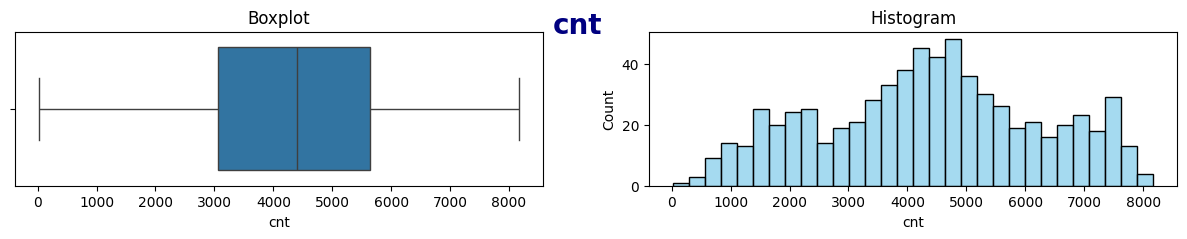

In [17]:
for i in range(0, len(day_df.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    plt.suptitle(day_df.columns[i], fontsize=20, fontweight='bold', color='navy')

    # Membuat boxplot
    sns.boxplot(x=day_df.columns[i], data=day_df, ax=ax[0])
    ax[0].set_title('Boxplot')

    # Membuat histogram
    sns.histplot(data=day_df, x=day_df.columns[i], bins=30, color='skyblue', ax=ax[1])
    ax[1].set_title('Histogram')

    plt.show()

In [18]:
outlier_columns = ["windspeed", "casual", "registered", "cnt"]

# Menghapus outlier menggunakan IQR
for col in outlier_columns:
    Q1 = hour_df[col].quantile(0.25)  # Kuartil 1
    Q3 = hour_df[col].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang Interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter hanya data dalam rentang IQR
    hour_df = hour_df[(hour_df[col] >= lower_bound) & (hour_df[col] <= upper_bound)]

print(f"Jumlah data setelah menghapus outlier: {len(hour_df)}")

Jumlah data setelah menghapus outlier: 14954


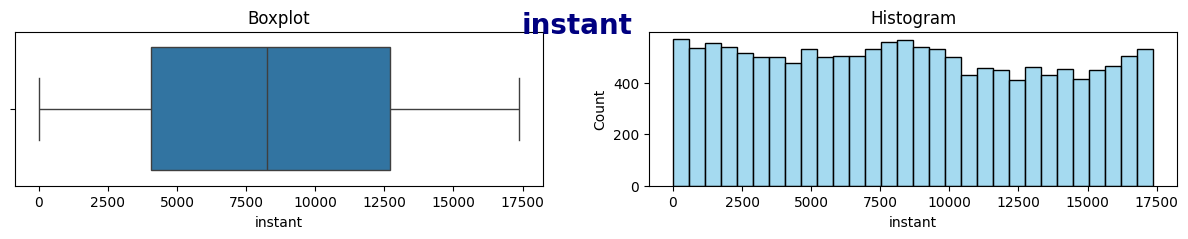

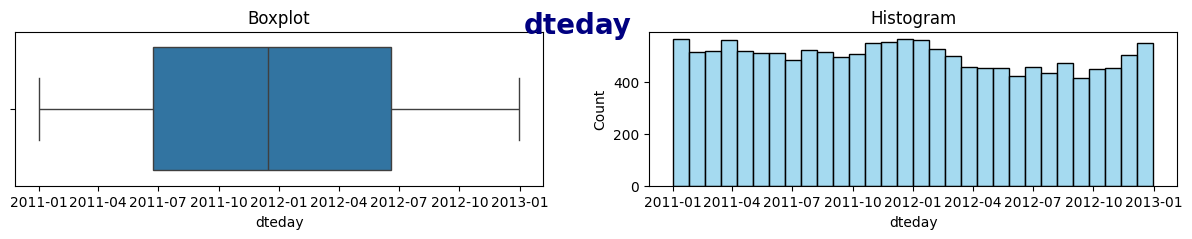

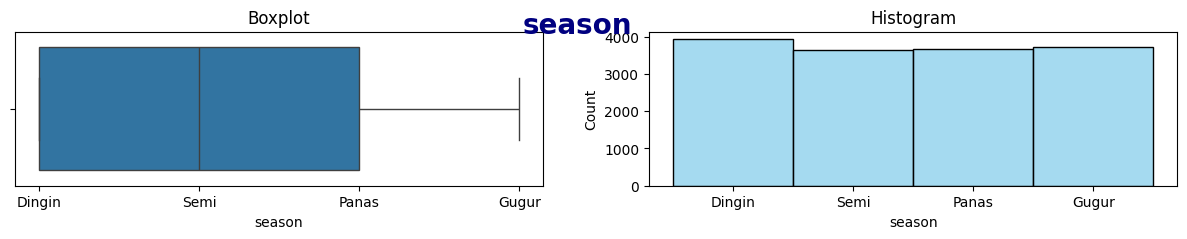

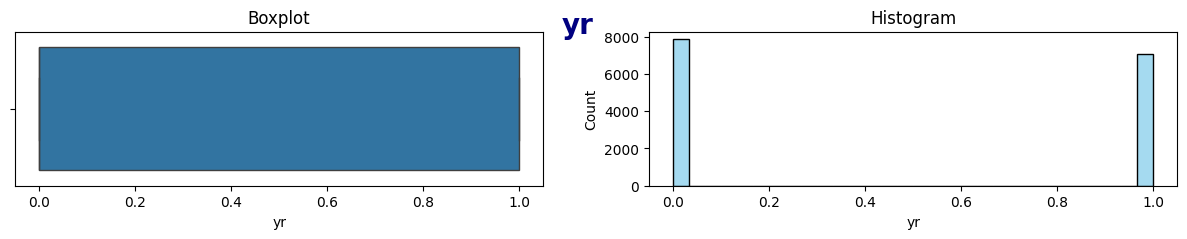

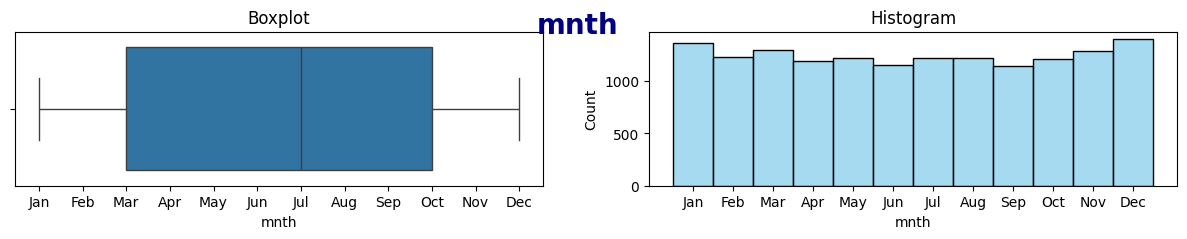

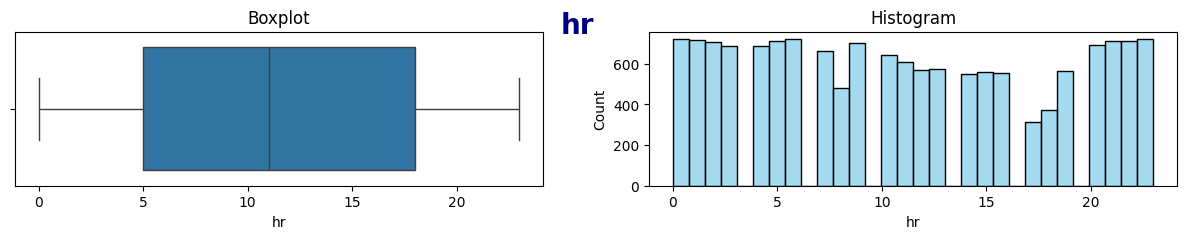

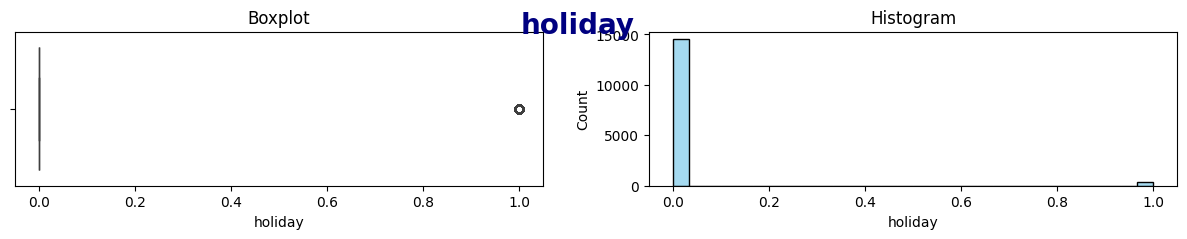

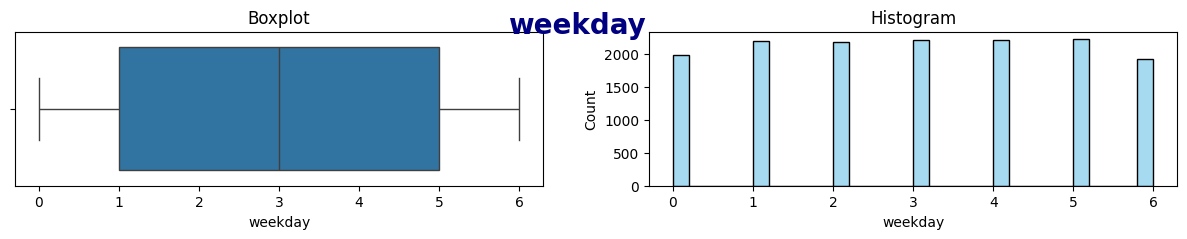

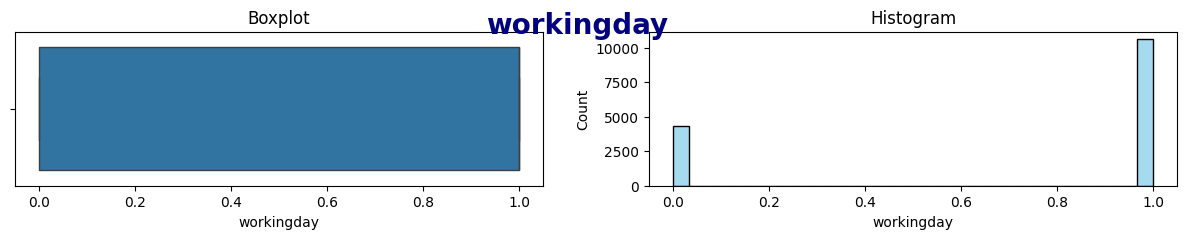

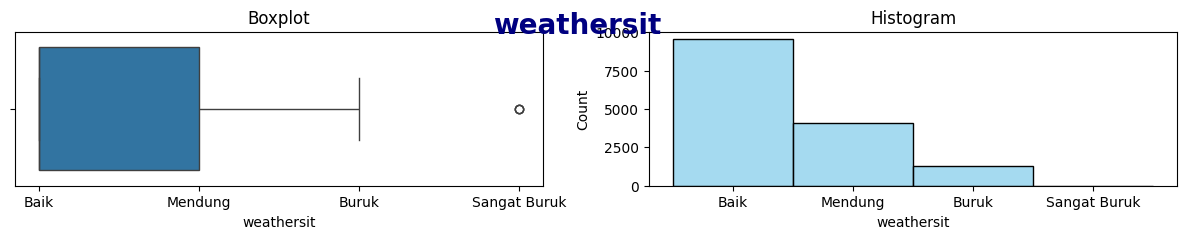

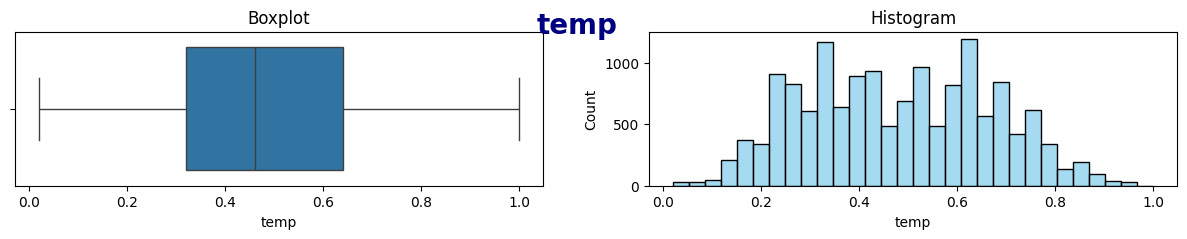

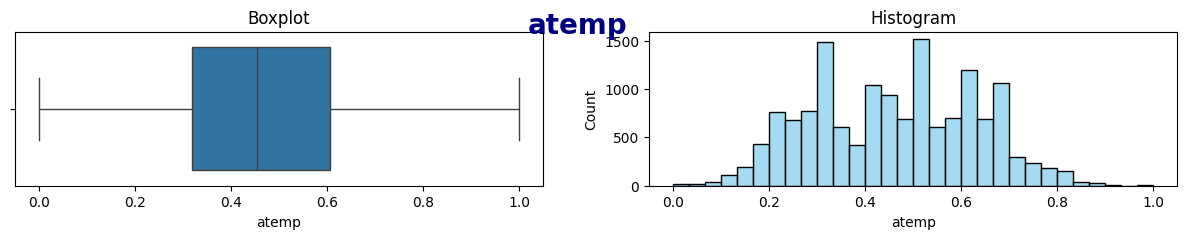

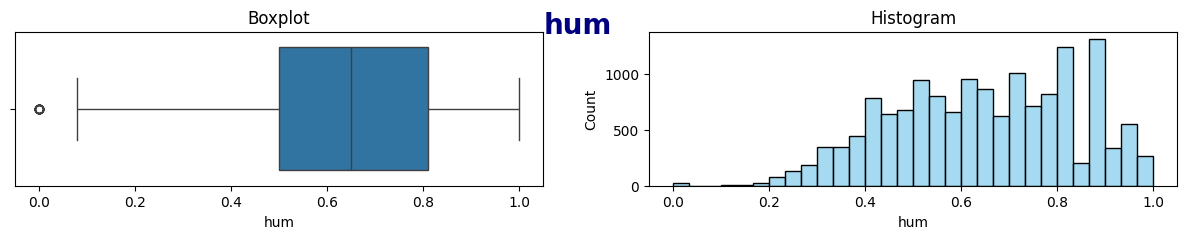

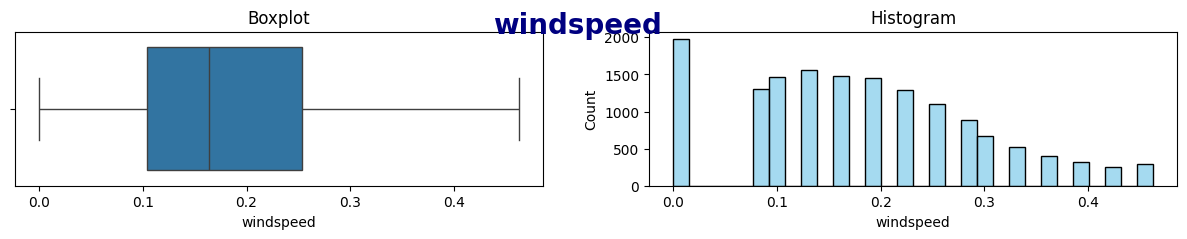

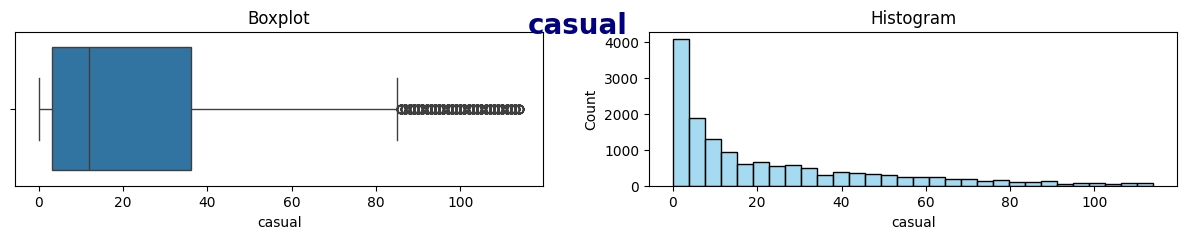

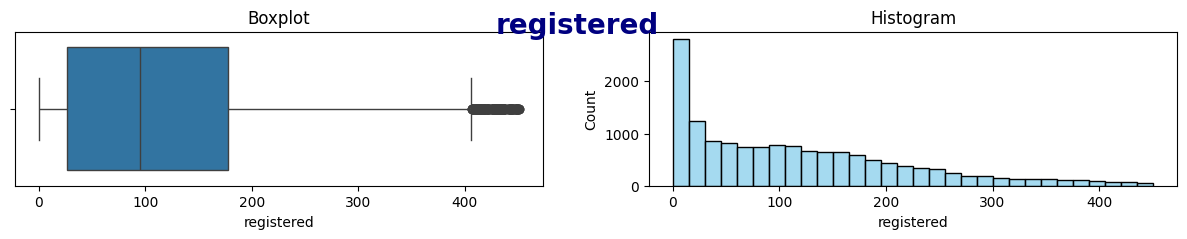

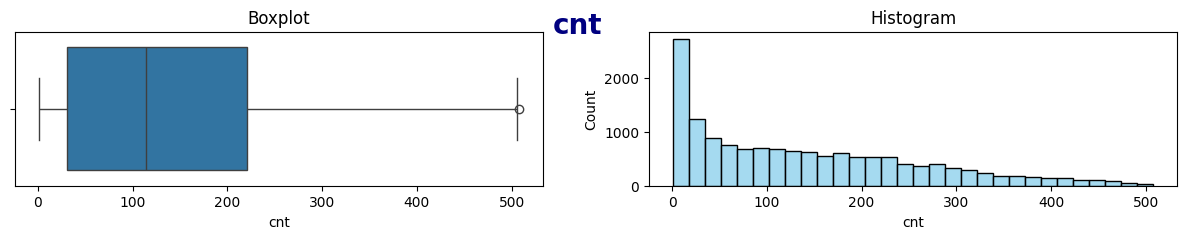

In [19]:
for i in range(0, len(hour_df.columns)):
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    plt.suptitle(hour_df.columns[i], fontsize=20, fontweight='bold', color='navy')

    # Membuat boxplot
    sns.boxplot(x=hour_df.columns[i], data=hour_df, ax=ax[0])
    ax[0].set_title('Boxplot')

    # Membuat histogram
    sns.histplot(data=hour_df, x=hour_df.columns[i], bins=30, color='skyblue', ax=ax[1])
    ax[1].set_title('Histogram')

    plt.show()

**Insight:**
- Tidak semua kolom perlu dibersihkan dari outlier, sehingga pada kasus yang saya gunakan hanya beberapa kolom yang saya bersihkan karena dapat mengganggu analisis.
- Contohnya kolom Casual, Registered, Cnt yang perlu dibersihkan karena mempengaruhi hasil analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,677.000000,677,677,677.000000,677,677.000000,677.000000,677.000000,677,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Panas,NaN,Jan,NaN,NaN,NaN,Baik,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,173,NaN,61,NaN,NaN,NaN,422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,357.927622,2011-12-23 22:15:46.528803328,NaN,0.475628,NaN,0.026588,2.960118,0.725258,NaN,0.489410,0.469137,0.632180,0.186842,744.788774,3624.245199,4369.033973
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,175.000000,2011-06-24 00:00:00,NaN,0.000000,NaN,0.000000,1.000000,0.000000,NaN,0.329167,0.326383,0.524583,0.134329,304.000000,2481.000000,3068.000000
50%,349.000000,2011-12-15 00:00:00,NaN,0.000000,NaN,0.000000,3.000000,1.000000,NaN,0.479167,0.470317,0.630833,0.178483,684.000000,3614.000000,4401.000000
75%,545.000000,2012-06-28 00:00:00,NaN,1.000000,NaN,0.000000,5.000000,1.000000,NaN,0.653333,0.607958,0.734583,0.231017,1033.000000,4692.000000,5634.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,NaN,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.378108,2301.000000,6946.000000,8173.000000


In [21]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Dingin,0,Jan,0,6,0,Mendung,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Dingin,0,Jan,0,0,0,Mendung,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Dingin,0,Jan,0,1,1,Baik,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Dingin,0,Jan,0,2,1,Baik,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Dingin,0,Jan,0,3,1,Baik,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Dingin,1,Dec,0,4,1,Mendung,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Dingin,1,Dec,0,5,1,Mendung,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Dingin,1,Dec,0,6,0,Mendung,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Dingin,1,Dec,0,0,0,Baik,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [22]:
day_df.corr(numeric_only=True)

,instant,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.863206,0.017717,-0.030471,0.066620,0.134901,0.136964,0.023266,-0.122366,0.231466,0.657571,0.622267
yr,0.863206,1.000000,0.008066,-0.040070,0.075978,0.027481,0.026201,-0.098530,-0.026094,0.178043,0.591670,0.551288
holiday,0.017717,0.008066,1.000000,-0.096447,-0.268521,-0.063254,-0.067450,-0.020891,0.036005,0.013272,-0.119049,-0.096928
weekday,-0.030471,-0.040070,-0.096447,1.000000,0.074691,-0.008469,-0.016946,-0.032084,0.002718,0.008418,0.033272,0.030547
workingday,0.066620,0.075978,-0.268521,0.074691,1.000000,0.116422,0.114988,0.001239,-0.017379,-0.424888,0.371580,0.193226
temp,0.134901,0.027481,-0.063254,-0.008469,0.116422,1.000000,0.991499,0.124149,-0.138877,0.585748,0.542042,0.625526
atemp,0.136964,0.026201,-0.067450,-0.016946,0.114988,0.991499,1.000000,0.136676,-0.166261,0.584793,0.544837,0.627618
hum,0.023266,-0.098530,-0.020891,-0.032084,0.001239,0.124149,0.136676,1.000000,-0.208912,-0.078819,-0.098294,-0.105622
windspeed,-0.122366,-0.026094,0.036005,0.002718,-0.017379,-0.138877,-0.166261,-0.208912,1.000000,-0.179130,-0.215292,-0.233194
casual,0.231466,0.178043,0.013272,0.008418,-0.424888,0.585748,0.584793,-0.078819,-0.179130,1.000000,0.421048,0.641256


In [23]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14954.000000,14954,14954,14954.000000,14954,14954.000000,14954.000000,14954.000000,14954.000000,14954,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Dingin,NaN,Dec,NaN,NaN,NaN,NaN,Baik,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3936,NaN,1402,NaN,NaN,NaN,NaN,9563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8414.989769,2011-12-21 16:24:48.725424640,NaN,0.473920,NaN,11.092283,0.027752,2.994383,0.709844,NaN,0.478807,0.460232,0.645230,0.180174,23.144175,117.222616,140.366791
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4065.250000,2011-06-23 00:00:00,NaN,0.000000,NaN,5.000000,0.000000,1.000000,0.000000,NaN,0.320000,0.318200,0.500000,0.104500,3.000000,26.000000,31.000000
50%,8246.500000,2011-12-15 00:00:00,NaN,0.000000,NaN,11.000000,0.000000,3.000000,1.000000,NaN,0.460000,0.454500,0.650000,0.164200,12.000000,95.000000,114.000000
75%,12717.750000,2012-06-19 00:00:00,NaN,1.000000,NaN,18.000000,0.000000,5.000000,1.000000,NaN,0.640000,0.606100,0.810000,0.253700,36.000000,178.000000,221.000000
max,17379.000000,2012-12-31 00:00:00,NaN,1.000000,NaN,23.000000,1.000000,6.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.462700,114.000000,451.000000,508.000000


In [24]:
hour_df.corr(numeric_only=True)

,instant,yr,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.859422,-0.025448,0.018421,-0.007817,-0.006553,0.123297,0.124687,0.037411,-0.087709,0.131896,0.201404,0.200938
yr,0.859422,1.000000,-0.025197,0.013309,-0.014231,-0.009048,0.017548,0.016129,-0.058992,-0.027357,0.097634,0.160776,0.158755
hr,-0.025448,-0.025197,1.000000,-0.002230,-0.006808,0.027545,0.091723,0.090032,-0.246833,0.120215,0.375459,0.437172,0.455373
holiday,0.018421,0.013309,-0.002230,1.000000,-0.098628,-0.264254,-0.055845,-0.059849,-0.010282,0.019482,0.000267,-0.054345,-0.046493
weekday,-0.007817,-0.014231,-0.006808,-0.098628,1.000000,0.048479,0.001524,-0.004451,-0.023556,0.001729,0.020109,0.036319,0.035443
workingday,-0.006553,-0.009048,0.027545,-0.264254,0.048479,1.000000,0.132034,0.130499,-0.038834,0.006402,-0.094204,0.189148,0.141720
temp,0.123297,0.017548,0.091723,-0.055845,0.001524,0.132034,1.000000,0.988921,-0.005045,-0.032196,0.504825,0.291010,0.358050
atemp,0.124687,0.016129,0.090032,-0.059849,-0.004451,0.130499,0.988921,1.000000,0.007774,-0.072902,0.498596,0.290022,0.355862
hum,0.037411,-0.058992,-0.246833,-0.010282,-0.023556,-0.038834,-0.005045,0.007774,1.000000,-0.269930,-0.336079,-0.265328,-0.299691
windspeed,-0.087709,-0.027357,0.120215,0.019482,0.001729,0.006402,-0.032196,-0.072902,-0.269930,1.000000,0.092163,0.093715,0.100133


In [25]:
day_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
571,572,2012-07-25,Panas,1,Jul,0,3,1,Baik,0.724167,0.654054,0.450000,0.164800,1383,6790,8173
629,630,2012-09-21,Panas,1,Sep,0,5,1,Baik,0.599167,0.571971,0.668750,0.154229,1250,6917,8167
643,644,2012-10-05,Gugur,1,Oct,0,5,1,Baik,0.615000,0.580187,0.627500,0.106350,1516,6640,8156
622,623,2012-09-14,Panas,1,Sep,0,5,1,Baik,0.633333,0.594083,0.672500,0.103863,1379,6630,8009
620,621,2012-09-12,Panas,1,Sep,0,3,1,Baik,0.599167,0.570075,0.577083,0.131846,1050,6820,7870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,Dingin,0,Mar,0,0,0,Mendung,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,Dingin,0,Jan,0,3,1,Buruk,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,Dingin,1,Dec,0,3,1,Buruk,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,Dingin,0,Jan,0,4,1,Baik,0.195000,0.219700,0.687500,0.113837,15,416,431


In [26]:
hour_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2755,2756,2011-04-29,Semi,0,Apr,17,0,5,1,Mendung,0.52,0.5000,0.45,0.3881,75,433,508
3715,3716,2011-06-08,Semi,0,Jun,17,0,3,1,Baik,0.92,0.8485,0.35,0.2239,80,426,506
5932,5933,2011-09-09,Panas,0,Sep,17,0,5,1,Baik,0.70,0.6667,0.79,0.2537,54,451,505
13455,13456,2012-07-19,Panas,1,Jul,20,0,4,1,Baik,0.82,0.7727,0.49,0.1642,65,440,505
12805,12806,2012-06-22,Panas,1,Jun,18,0,5,1,Mendung,0.80,0.7576,0.55,0.1940,62,443,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5549,5550,2011-08-24,Panas,0,Aug,3,0,3,1,Baik,0.58,0.5455,0.68,0.1343,0,1,1
9078,9079,2012-01-19,Dingin,1,Jan,4,0,4,1,Baik,0.12,0.1515,0.54,0.1045,0,1,1
17215,17216,2012-12-25,Dingin,1,Dec,4,1,2,0,Mendung,0.24,0.2576,0.87,0.0896,0,1,1
507,508,2011-01-23,Dingin,0,Jan,6,0,0,0,Mendung,0.04,0.0758,0.57,0.1045,0,1,1


In [27]:
day_df.groupby(by="mnth").agg({
    "season": "max",
    "cnt": ["min", "max"]
}).sort_values(by=("cnt", "max"), ascending=False)

season   cnt      
         max   min   max
mnth                    
Jul    Panas  3285  8173
Sep    Panas  1842  8167
Oct    Gugur    22  8156
Aug    Panas  1115  7765
Jun     Semi  3767  7736
May     Semi  2633  7639
Apr     Semi   795  7290
Mar     Semi   605  6871
Nov    Gugur  1495  6852
Dec    Gugur   441  6606
Feb   Dingin  1005  5062
Jan   Dingin   431  4521

In [28]:
hour_df.groupby(by="mnth").agg({
    "season": "max",
    "cnt": ["min", "max"]
}).sort_values(by=("cnt", "max"), ascending=False)

season cnt     
         max min  max
mnth                 
Apr     Semi   1  508
Jun     Semi   1  506
Jul    Panas   1  505
Sep    Panas   1  505
May     Semi   1  503
Aug    Panas   1  500
Oct    Gugur   1  500
Nov    Gugur   1  496
Dec    Gugur   1  484
Mar     Semi   1  479
Jan   Dingin   1  470
Feb   Dingin   1  465

In [29]:
day_df.groupby(by="season").agg({
    "mnth": "max",
    "cnt": ["min", "max"]
}).sort_values(by=("cnt", "max"), ascending=False)

mnth   cnt      
        max   min   max
season                 
Panas   Sep  1115  8173
Gugur   Sep    22  8156
Semi    May   795  7736
Dingin  Mar   431  6312

In [30]:
hour_df.groupby(by="season").agg({
    "mnth": "max",
    "cnt": ["min", "max"]
}).sort_values(by=("cnt", "max"), ascending=False)

mnth cnt     
        max min  max
season              
Semi    May   1  508
Panas   Sep   1  505
Gugur   Sep   1  502
Dingin  Mar   1  479

**Insight:**
- Setelah eksplor data, saya mendapatkan kesimpulan bahwa pada cuaca panas, gugur, dan semi akan selalu lebih banyak pemakainya dibandingkan pada cuaca dingin.
- Cuaca semi dan panas menjadi 2 musin yang paling banyak pemakai sepedanya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pengaruh cuara terhadap jumlah penyewaan sepeda?

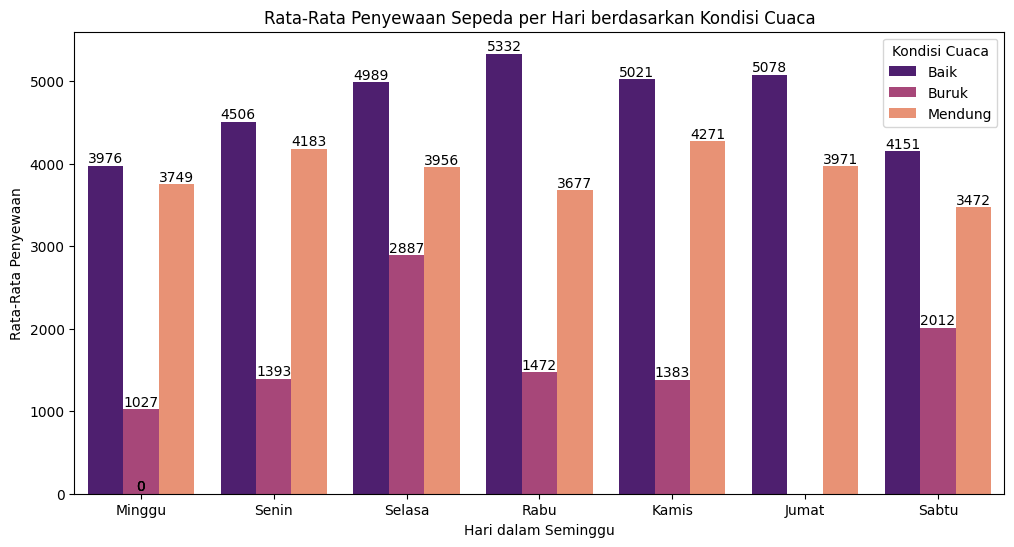

In [31]:
data = day_df.groupby(['weekday', 'weathersit'])['cnt'].mean().reset_index()

palette = sns.color_palette("magma", as_cmap=True)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='weekday', y='cnt', hue='weathersit', data=data, palette='magma')

plt.title('Rata-Rata Penyewaan Sepeda per Hari berdasarkan Kondisi Cuaca')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-Rata Penyewaan')
plt.xticks(ticks=range(7), labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])

for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.legend(title='Kondisi Cuaca')
plt.show()

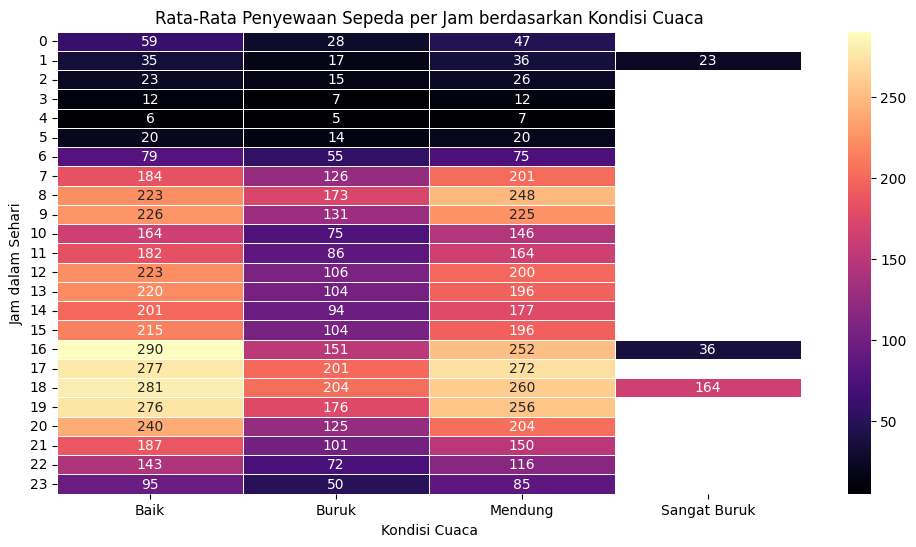

In [32]:
data = hour_df.groupby(['hr', 'weathersit'])['cnt'].mean().reset_index()

pivot_data = data.pivot(index='hr', columns='weathersit', values='cnt')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap="magma", annot=True, fmt=".0f", linewidths=0.5)

plt.title('Rata-Rata Penyewaan Sepeda per Jam berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jam dalam Sehari')
plt.yticks(rotation=0)
plt.show()

### Pertanyaan 2:

Apakah cuaca sangat buruk secara signifikan mengurangi jumlah penyewaan sepeda?

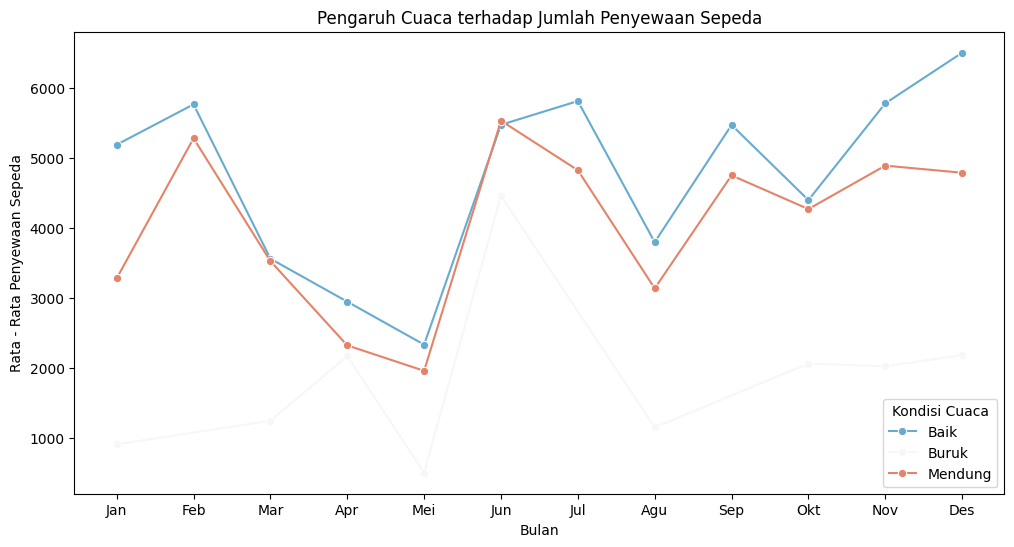

In [33]:
data = day_df.groupby(['mnth', 'weathersit'])['cnt'].mean().reset_index()

data = data.sort_values(by='mnth')

palette = list(reversed(sns.color_palette("RdBu", 3)))

plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', hue='weathersit', data=data, marker='o', palette=palette)

plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Bulan')
plt.ylabel('Rata - Rata Penyewaan Sepeda')
plt.xticks(ticks=range(0, 12), labels=[
    "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"
])

plt.legend(title="Kondisi Cuaca")

plt.show()

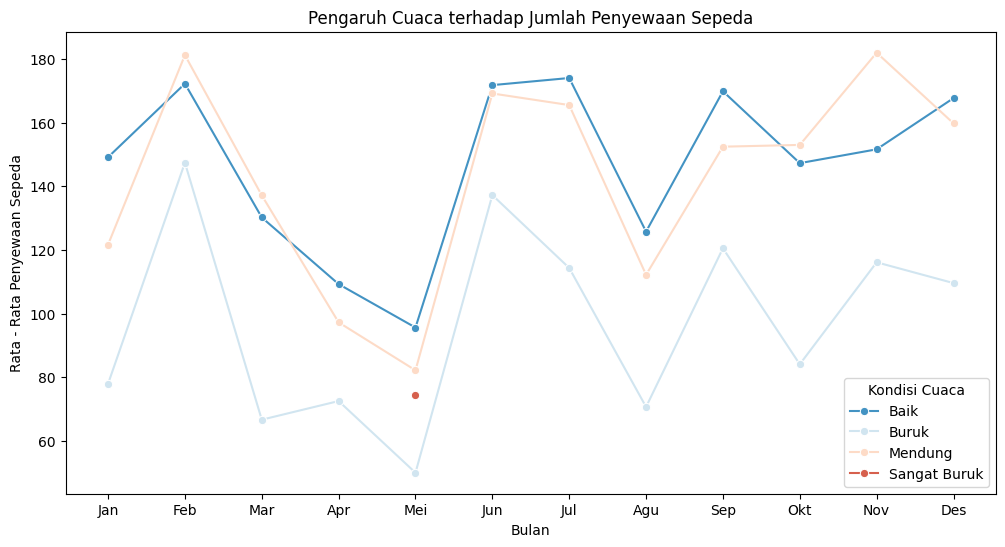

In [34]:
data = hour_df.groupby(['mnth', 'weathersit'])['cnt'].mean().reset_index()

data = data.sort_values(by='mnth')

palette = list(reversed(sns.color_palette("RdBu", 4)))

plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', hue='weathersit', data=data, marker='o', palette=palette)

plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Bulan')
plt.ylabel('Rata - Rata Penyewaan Sepeda')
plt.xticks(ticks=range(0, 12), labels=[
    "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"
])

plt.legend(title="Kondisi Cuaca")

plt.show()

## Conclusion

- Jumlah penyewaan sepeda dipengaruhi oleh kondisi cuaca. Dapat dilihat pada barplot jumlah penyewaan sepeda sangat tinggi pada cuaca baik.
- Tidak selalu. Cuaca sangat buruk terdapat bulan Mei, tetapi angka penyewaan masih lebih sedikit pada cuara buruk. Tetapi memang cuaca sagar buruk selalu di bawah cuaca mendung maupun baik.